# Testing pyNamo

## Settings

In [1]:
inspect.getsource(drawer.setSimplex)

NameError: name 'inspect' is not defined

In [1]:
import time
import random
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import drawer
import parameters as param

import equationsolver as eqsol
import inspect
import importlib

In [2]:
#After making changes to a source file, one must use the "reload" command in order to take into account the changes
importlib.reload(drawer)

<module 'drawer' from '/Users/slimane/Documents/GitHub/pyNamo/drawer.py'>

In [3]:
#Setting LaTeX fonts for plotting in matplotlib

from matplotlib import rc, rcParams
rc('text',usetex=True)
rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       #r'\usepackage{fouriernc}',
       r'\usepackage{times}',
       r'\usepackage{marvosym}',
       #r'\usepackage[defaultsans]{lato}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\renewcommand\familydefault{\sfdefault}',
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
       r'\Large'
]
#rc('font',**{'family':'serif','serif':['fouriernc']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})


#Setting figure size
#plt.rcParams['figure.figsize'] = [5, (4.8/6.4)*5]
plt.rcParams['figure.dpi'] = 150

%config InlineBackend.figure_format = 'retina'


ValueError: Key text.latex.preamble: Could not convert ['\\usepackage{siunitx}', '\\sisetup{detect-all}', '\\usepackage{times}', '\\usepackage{marvosym}', '\\usepackage{sansmath}', '\\renewcommand\\familydefault{\\sfdefault}', '\\sansmath\\Large'] to str

## First test

NameError: name 'pMrps' is not defined

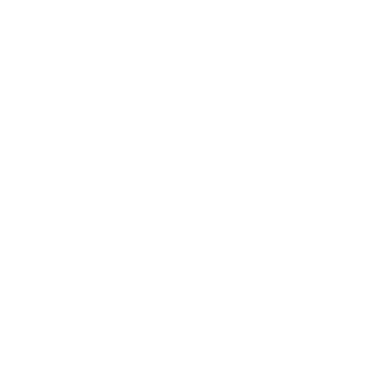

In [4]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')

drawer.setSimplex(['$R$','$P$','$S$'], pMrps, ax, 13, 53)

In [3]:
strat[1]

NameError: name 'strat' is not defined

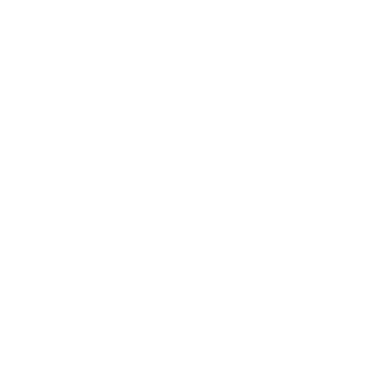

In [7]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')
plt.plot(clip_on=False)


strat = ['$R$','$P$','$S$']
plt.show(lbl3)

 Text(0.49, 0.9060254037844386, '$R$'),
 Text(0.08, 0.01, '$P$'),
 Text(1.12, -0.01, '$S$')]

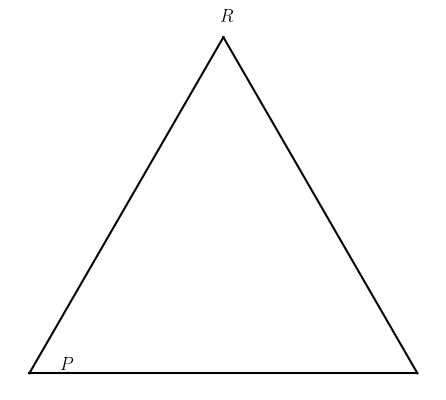

In [6]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')

strat = ['$R$','$P$','$S$']

pt1 = eqsol.p_to_sim(1,0)
pt2 = eqsol.p_to_sim(0,1)
pt3 = eqsol.p_to_sim(0,0)
lbl1 = ax.annotate(strat[0], (pt1[0] - 0.01, pt1[1] + 0.04), fontsize=13, zorder = 53)
lbl2 = ax.annotate(strat[1], (pt2[0] + 0.08, pt2[1] + 0.01), fontsize=13, zorder = 53)
lbl3 = ax.annotate(strat[2], (pt3[0] + 0.12, pt3[1] - 0.01), fontsize=13, zorder = 53)
xs = [[pt1[0], pt2[0]], [pt1[0], pt3[0]], [pt2[0], pt3[0]]]
ys = [[pt1[1], pt2[1]], [pt1[1], pt3[1]], [pt2[1], pt3[1]]]
bdr1 = plt.plot(xs[0], ys[0], color='black', zorder=53, alpha=1, clip_on=False)
bdr2 = plt.plot(xs[1], ys[1], color='black', zorder=53, alpha=1, clip_on=False)
bdr3 = plt.plot(xs[2], ys[2], color='black', zorder=53, alpha=1, clip_on=False)
bdr1+bdr2+bdr3+[lbl1]+[lbl2]+[lbl3]


FP [0.0, 0.0, 1.0] | eigVs [2.0, 5.0]
FP [0.0, 0.71, 0.29] | eigVs [-1.43, -0.86]
FP [0.0, 1.0, 0.0] | eigVs [2.0, 0.0]
FP [1.0, 0.0, 0.0] | eigVs [-1.0, 2.0]


/Users/slimane/Documents/GitHub/pyNamo/drawer.py:380: UserWarning: The following kwargs were not used by contour: 'clip_on'
  surf = ax.contourf(X, Y, C, levels=levels, cmap=cmap, corner_mask = False, alpha=0.9, clip_on=False, zorder=zd)


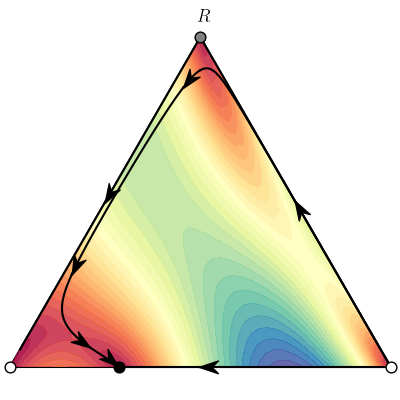

In [8]:
arrowSize= 1/20.0
arrowWidth= (1/3)*arrowSize
#step = 0.01

pMrps = np.array([[0,0,2],[2,0,5],[-1,2,0]]) #Good Rock-Paper-Scissors game

fig, ax = plt.subplots()

ax.set_aspect('equal')
plt.axis('off')

plt.plot(clip_on=False)

drawer.setSimplex(['$R$','$P$','$S$'], pMrps, ax, 13, 50)
drawer.trajectory([0.9, 0.05], pMrps, param.step, [0.01, 0.06, 0.12, 0.2], 50, fig, ax, 'black', arrowSize, arrowWidth, 53)
drawer.trajectory([0.5, 0], pMrps, param.step, [0.0001], 10, fig, ax, 'black', arrowSize, arrowWidth, 53)
drawer.trajectory([0,0.5], pMrps, param.step, [0.0001], 10, fig, ax, 'black', arrowSize, arrowWidth, 53)
drawer.trajectory([0.5, 0.5], pMrps, param.step, [0.0001], 10, fig, ax, 'black', arrowSize, arrowWidth, 53)
drawer.speed_plot([0, 1], [0, np.sqrt(3/4)], 50, pMrps, ax, cm.Spectral, levels = 30, zd=52)
eqs = drawer.equilibria(pMrps, ax, 'black', 'gray', 'white', 60, 54)

plt.savefig("testSimplex.pdf")

The above figure poses a problem because when I display the speed contours, it doesn't show the labels $S$ (*Scissors*) and $P$ (*Paper*).

The replicator dynamics take the form
$$ \dot{x}_i = x_i \left( w_i(x) - \bar{w}(x) \right), \forall i\in A, $$
where $A$ denotes the action set, $x_i\in [0,1]$ is the freqency of strategy $i\in A$, we use a dot to denote the time derivative, $\dot{x}_i = \mathrm{d}x/\mathrm{d}t$, $w_i(x) = \sum_{j\in A} \pi(i,j) x_j$ denotes the expected payoff to strategy $i$ when the population is in state $x \in\Delta A$. We write $\bar{w}(x)$ for the average payoff over all strategies at state $x$.

In [16]:
arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])
arr3 = arr1+arr2
arr3

array([5, 7, 9])